# Visualisierung der Daten



## Installieren der benötigten Bibliotheken

Für die Visualisierung müssen verschiedene Python-Bibliotheken installiert werden: Datenanalyse, Visualisierung, Geodatenverarbeitung und die Erstellung interaktiver Karten. Die Installation erfolgt mit `pip` in den angegebenen Versionen:

In [15]:
# pandas: Für die Datenanalyse und -manipulation
!pip install pandas==2.2.2

# seaborn: Für die Datenvisualisierung
!pip install seaborn==0.13.2

# branca: Hilfsfunktionen für die Arbeit mit Leaflet-Karten in Folium
!pip install branca==0.8.0

# folium: Für die Erstellung interaktiver Karten
!pip install folium==0.14.0

# matplotlib: Für die Erstellung statischer Visualisierungen
!pip install matplotlib==3.7.1

#geopandas: Für die Arbeit mit Geodaten
!pip install geopandas==1.0.1

#geopy: Für Geokodierungsaufgaen
!pip install geopy==2.3.0

#fiona: Für das Lesen und Schreiben von Vektor-Geodatendateiformaten
!pip install fiona==1.8.21

## Google Drive einbinden

In Google Colab können Dateien aus Google Drive genutzt werden, indem Drive gemountet wird. Der folgende Code bindet Google Drive in die Colab-Umgebung ein:

In [36]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Importieren der benötigten Bibliotheken

Um die Datenanalyse, -visualisierung und Geodatenverarbeitung durchzuführen, müssen die entsprechenden Bibliotheken in Python importiert werden. Die folgenden Bibliotheken werden für die Analyse, Erstellung interaktiver Karten und Visualisierungen verwendet:

In [35]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from branca.colormap import linear
from matplotlib.colors import LinearSegmentedColormap
import branca
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Laden und Vorbereiten der Shapefile-Daten der Schweizer Kantonsgrenzen

In diesem Abschnitt wird der Pfad zu einer Shapefile-Datei der Schweizer Kantonsgrenzen festgelegt und die Datei geladen. Gleichzeitig wird das Koordinatensystem der Daten auf das gängige WGS84-Koordinatensystem (EPSG:4326) umgewandelt, um eine korrekte geographische Darstellung zu gewährleisten. Zudem werden die Kantonsnamen für eine spätere Zusammenführung angepasst.

Quelle: https://www.swisstopo.admin.ch/de/landschaftsmodell-swissboundaries3d

In [37]:
# Pfad zur Shapefile-Datei der Schweizer Kantonsgrenzen
shapefile_path = "/content/drive/MyDrive/ie_scripting_datasets/swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shp"

# Laden der Kantonsgrenzen und Konvertierung in das Koordinatensystem WGS84 (Latitude/Longitude)
cantons_gdf = gpd.read_file(shapefile_path)
if cantons_gdf.crs is None or cantons_gdf.crs.to_string() != 'EPSG:2056':
    cantons_gdf.crs = "EPSG:2056"
cantons_gdf = cantons_gdf.to_crs(epsg=4326)

# Umbenennung der Kantonsnamen für das Merging
cantons_gdf['Kanton'] = cantons_gdf['NAME'].replace({
    'ZÃ¼rich': 'Zürich', 'GraubÃ¼nden': 'Graubünden', 'NeuchÃ¢tel': 'Neuenburg', 'GenÃ¨ve': 'Genf',
    'Fribourg': 'Freiburg', 'Ticino': 'Tessin', 'Vaud': 'Waadt', 'Valais': 'Wallis'
})


# Mietkosten, Sonnenscheindauer und Stromkosten in den Schweizer Kantonen

In der Schweiz variieren Mietkosten, Sonnenscheindauer und Stromkosten je nach Kanton. In den nachfolgenden Visualisierungen werden die diese drei Aspekte dargestellt, um einen Überblick über die regionalen Unterschiede in den verschiedenen Kantonen der Schweiz zu geben.

- **Mietkosten:** Der monatliche Netto-Mietzins für 4-Zimmer-Wohnungen wird in Franken pro Kanton ausgewiesen und gibt einen Vergleich der Kosten für Mieter.
  
- **Sonnenscheinstunden:** Die monatliche Sonnenscheindauer je Kanton wird basierend auf den Daten von MeteoSchweiz erfasst und gibt einen Überblick über die durchschnittliche Sonneneinstrahlung.

- **Stromkosten:** Die jährlichen Stromkosten für eine 4-Zimmer-Wohnung mit Elektroherd werden auf Basis eines Standardprodukts in kWh und Rappen pro kWh ermittelt.

# Verarbeitung und Analyse der Daten zu Sonnenscheindauer, Mietkosten und Stromkosten für das Jahr 2020

In diesem Abschnitt wird die JSON-Datei mit Daten zu Mietkosten, Sonnenscheindauer und Stromkosten geladen und aufbereitet. Der Code filtert die relevanten Informationen und berechnet den Durchschnitt der verschiedenen Kennzahlen für jeden Kanton. Anschliessend werden die Spalten gerundet und umbenannt, um die Ergebnisse übersichtlich darzustellen. Diese bereinigten und aggregierten Daten bieten eine Übersicht der durchschnittlichen Sonnenscheindauer, Mietkosten für 4-Zimmer-Wohnungen und Stromkosten je Kanton für das Jahr 2020.

Der folgende Code führt die folgenden Schritte aus:

1. **Daten laden:** Die JSON-Datei wird in ein DataFrame eingelesen.
2. **Daten filtern:** Es werden nur relevante Spalten und Zeilen mit dem "Standardprodukt" ausgewählt.
3. **Durchschnitt berechnen:** Für jeden Kanton werden die Durchschnittswerte der Sonnenscheindauer, Mietkosten und Stromkosten berechnet.
4. **Daten aufbereiten:** Die Ergebnisse werden gerundet und die Spalten entsprechend umbenannt.
5. **Ergebnisse anzeigen:** Die bereinigte und aggregierte Tabelle wird ausgegeben.

In [39]:
# Pfad zur JSON-Datei
file_path = '/content/drive/MyDrive/ie_scripting_datasets/sunshine_data_strom_mietpreise_2020_df.json'

# Einlesen der JSON-Datei
df = pd.read_json(file_path)

# Filtern nach den Spalten: Kanton, Produkt, Total_Sunhours, 4-Zimmer
df_filtered = df[['Kanton', 'Produkt', 'Total exkl. MWST (Rp./kWH)','Total_Sunhours', '4-Zimmer']]

# Filtern der Zeilen, in denen das Produkt "Standardprodukt" ist
df_filtered = df_filtered[df_filtered['Produkt'] == 'Standardprodukt']

# Berechnung des Durchschnitts für jeden Kanton
df_avg = df_filtered.groupby('Kanton').agg({
    'Total_Sunhours': 'mean',  # Durchschnitt der Total_Sunhours
    '4-Zimmer': 'mean',         # Durchschnitt der 4-Zimmer Spalte
    'Total exkl. MWST (Rp./kWH)': 'mean'# Durchschnitt der Total exkl. MWST (Rp./kWH)
}).reset_index()

# Runden der Spalten
df_avg['Total_Sunhours'] = df_avg['Total_Sunhours'].round(0).astype(int)  # Runden auf ganze Zahl und als Integer speichern
df_avg['4-Zimmer'] = df_avg['4-Zimmer'].round(0).astype(int)  # Runden auf ganze Zahl und als Integer speichern
df_avg['Total exkl. MWST (Rp./kWH)'] = df_avg['Total exkl. MWST (Rp./kWH)'].round(2)  # Runden auf 2 Dezimalstellen und als Integer speichern

# Umbenennen der Spalten
data_df = df_avg.rename(columns={
    'Total_Sunhours': 'Total Sonnenscheindauer',
    '4-Zimmer': 'Total Miete',
    'Total exkl. MWST (Rp./kWH)': 'Total Stromkosten'
})

# Tabelle anzeigen
print(data_df)



                    Kanton  Total Sonnenscheindauer  Total Miete  \
0                   Aargau                     1864         1555   
1   Appenzell Ausserrhoden                     1766         1341   
2    Appenzell Innerrhoden                     1766         1598   
3         Basel-Landschaft                     2037         1624   
4              Basel-Stadt                     2034         1717   
5                     Bern                     1914         1420   
6                 Freiburg                     2087         1444   
7                     Genf                     2113         1621   
8                   Glarus                     1429         1318   
9               Graubünden                     1875         1454   
10                    Jura                     2008         1091   
11                  Luzern                     1896         1506   
12               Neuenburg                     2028         1198   
13               Nidwalden                     1

# Visualisierung der Zusammenhänge zwischen Sonnenscheindauer, Mietkosten und Stromkosten

In diesem Abschnitt wird eine grafische Darstellung der Beziehungen zwischen der **Sonnenscheindauer** und den **Mietkosten** sowie den **Stromkosten** in den Schweizer Kantonen mittels einem linearen Regressionssatz erstellt.

1. **Sonnenscheindauer vs. Mietkosten:** In diesem Diagramm wird untersucht, wie die Sonnenscheindauer mit den monatlichen Mietkosten für 4-Zimmer-Wohnungen korreliert.
2. **Sonnenscheindauer vs. Stromkosten:** Dieses Diagramm zeigt, wie die Sonnenscheindauer in Relation zu den Stromkosten für eine Standard-4-Zimmer-Wohnung steht.


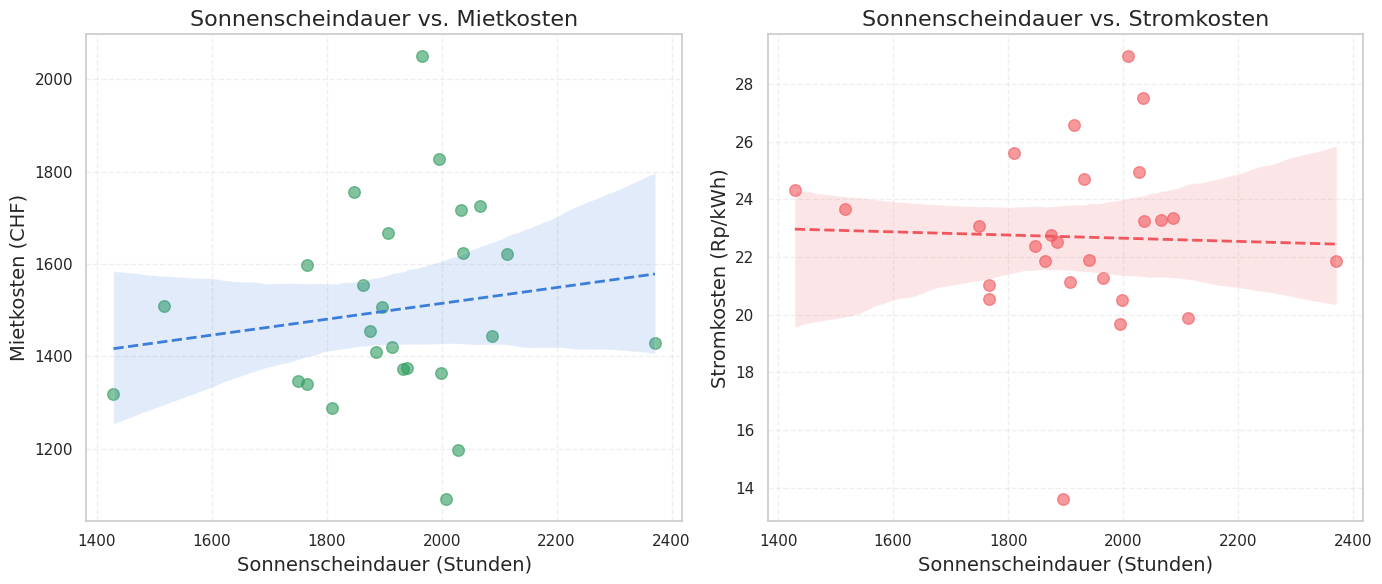

In [41]:
# Seaborn für eine schönere Darstellung
sns.set(style="whitegrid", palette="muted")

# Definition der Fläche für beide Diagramme
plt.figure(figsize=(14, 6))

# Sonnenscheindauer vs. Mietkosten
plt.subplot(1, 2, 1)
sns.regplot(x='Total Sonnenscheindauer', y='Total Miete', data=data_df,
            scatter_kws={'s': 70, 'alpha': 0.6, 'color': '#2d9b5d'},  # Punktgrösse und Transparenz
            line_kws={'color': '#3b7dd8', 'linewidth': 2, 'ls': '--'})  # Blaue Linie gestrichelt
plt.title('Sonnenscheindauer vs. Mietkosten', fontsize=16)
plt.xlabel('Sonnenscheindauer (Stunden)', fontsize=14)
plt.ylabel('Mietkosten (CHF)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)  # Weiche Rasterlinien

# Sonnenscheindauer vs. Stromkosten
plt.subplot(1, 2, 2)
sns.regplot(x='Total Sonnenscheindauer', y='Total Stromkosten', data=data_df,
            scatter_kws={'s': 70, 'alpha': 0.6, 'color': '#f0565b'},  # Punktgrösse und Transparenz
            line_kws={'color': '#f0565b', 'linewidth': 2, 'ls': '--'})  # Rote Linie, gestrichelt
plt.title('Sonnenscheindauer vs. Stromkosten', fontsize=16)
plt.xlabel('Sonnenscheindauer (Stunden)', fontsize=14)
plt.ylabel('Stromkosten (Rp/kWh)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)

# Anzeige und Speichern der Grafik
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ie_scripting_datasets/sonnenscheindauer_vs_miet_stromkosten.png', dpi=300)
plt.show()


# Zusammenführen der geographischen und aggregierten Datensätze

In diesem Abschnitt wird der geographische Datensatz der Schweizer Kantonsgrenzen mit den aggregierten Werten zu Sonnenscheindauer, Mietkosten und Stromkosten für jeden Kanton zusammengeführt. Dies ermöglicht es, die aggregierten Daten auf eine Karte zu projizieren und die regionalen Unterschiede visuell darzustellen.

Die Daten werden mithilfe des **GeoDataFrames** (`cantons_gdf`), das die Kantonsgrenzen enthält, und des bereinigten **DataFrames** (`data_df`), das die aggregierten Werte enthält, zusammengeführt. Dabei wird der Kanton als gemeinsamer Schlüssel verwendet, um die beiden Datensätze zu kombinieren.

In [42]:
# Zusammenführen des geographischen GeoDataFrames
merged_gdf = cantons_gdf.merge(data_df, on='Kanton', how='left')

# Erstellung einer interaktiven Karte mit Mietkosten, Stromkosten und Sonnenscheindauer

In diesem Abschnitt wird eine interaktive Karte erstellt, die die geografische Verteilung von **Sonnenscheindauer**, **Mietkosten** und **Stromkosten** für die Schweizer Kantone darstellt. Diese Visualisierung ermöglicht es, auf einfache Weise zu sehen, wie diese Variablen in verschiedenen Regionen der Schweiz variieren.

### Schritte der Karte:
1. **Karten-Erstellung:** Zunächst wird eine Karte mit dem Mittelpunkt der Schweiz generiert.
2. **Farbskala für Sonnenscheindauer:** Eine benutzerdefinierte Farbskala von **dunkelgelb** bis **hellgelb** wird erstellt, um die Kantonsflächen basierend auf der **Sonnenscheindauer** zu färben.
3. **Farbskalen für Miet- und Stromkosten:** Farbskalen für die **Mietkosten** und **Stromkosten** werden ebenfalls erstellt, um die Marker auf der Karte entsprechend diesen Werten zu färben.
4. **Marker für Miet- und Stromkosten:** Für jeden Kanton werden Marker auf der Karte gesetzt, die Informationen zu **Mietkosten** (Haus-Icon) und **Stromkosten** (Blitz-Icon) anzeigen.
5. **Tooltip:** Mit einem **Tooltip** werden zusätzliche Details angezeigt, wenn der Nutzer mit der Maus über die Kantonfläche fährt.
6. **Speichern und Anzeigen der Karte:** Die interaktive Karte wird als HTML-Datei gespeichert und kann im Webbrowser angezeigt werden.


In [43]:
# Erstellen der Karte mit Mittelpunkt Schweiz
m = folium.Map(location=[46.8182, 8.2275], zoom_start=7)

# Kalkulation der min und max Werte für 'Total Sonnenscheindauer'
min_val = merged_gdf['Total Sonnenscheindauer'].min() # Minimum 'Total Sonnenscheindauer'
max_val = merged_gdf['Total Sonnenscheindauer'].max() # Maximum 'Total Sonnenscheindauer'

# Erstellen der Farbskala von dunkelgelb bis hellgelb
colors = ["#FFFFE0", "#FFD700", "#FF8C00"]  # Dreifarbige Gelbskala
sunshine_colormap = branca.colormap.LinearColormap(colors=colors, vmin=min_val, vmax=max_val)
sunshine_colormap = sunshine_colormap.to_step(n=20, method='log')
sunshine_colormap.caption = 'Total Sonnenscheindauer'
sunshine_colormap.add_to(m)

# Stilfunktion für Kantonsflächen basierend auf der Sonnenscheindauer
def style_function(feature):
    return {
        'fillColor': sunshine_colormap(feature['properties']['Total Sonnenscheindauer']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    }

# Konvertiere die Timestamp-Spalten in Strings, vor der Erstellung von GeoJson
for col in merged_gdf.select_dtypes(include=['datetime64']).columns:
    merged_gdf[col] = merged_gdf[col].astype(str)

# Hinzufügen der Kantonsflächen zur Karte
folium.GeoJson(
    merged_gdf,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['Kanton', 'Total Sonnenscheindauer'],
        aliases=['Kanton:', 'Sonnenscheindauer:'],
        localize=True
    )
).add_to(m)

# Farbskalen für Mietkosten und Stromkosten
rent_colormap = linear.YlOrRd_09.scale(merged_gdf['Total Miete'].min(), merged_gdf['Total Miete'].max())
electricity_colormap = linear.YlOrRd_09.scale(merged_gdf['Total Stromkosten'].min(), merged_gdf['Total Stromkosten'].max())

# Hinzufügen der Marker für Mietkosten und Stromkosten
for idx, row in merged_gdf.iterrows():
    try:
        # Farbe für Mietkosten-Marker (Haus-Icon)
        rent_color = rent_colormap(row['Total Miete'])

        # Erster Marker für Mietkosten (Haus-Icon)
        folium.Marker(
            location=[row.geometry.centroid.y, row.geometry.centroid.x],
            popup=folium.Popup(f"<b>Kanton:</b> {row['Kanton']}<br>"
                               f"<b>Total Miete:</b> {row['Total Miete']}", max_width=300),
            icon=folium.Icon(color='blue', icon="home", prefix="fa", icon_color=rent_color)
        ).add_to(m)

        # Farbe für Stromkosten-Marker (Blitz-Icon)
        electricity_color = electricity_colormap(row['Total Stromkosten'])

        # Zweiter Marker für Stromkosten (Blitz-Icon)
        folium.Marker(
            location=[row.geometry.centroid.y + 0.08, row.geometry.centroid.x],  # leicht versetzt
            popup=folium.Popup(f"<b>Kanton:</b> {row['Kanton']}<br>"
                               f"<b>Stromkosten:</b> {row['Total Stromkosten']}", max_width=300),
            icon=folium.Icon(color='lightgray', icon="bolt", prefix="fa", icon_color=electricity_color)
        ).add_to(m)

    except Exception as e:
        print(f"Fehler bei der Verarbeitung von Kanton {row['Kanton']}: {e}")

# Speichern der Karte als HTML-Datei
m.save('/content/drive/MyDrive/ie_scripting_datasets/interaktive_karte_mit_mietkosten_stromkosten_und_sonnenscheindauer.html')

# Zeigen der Karte (im Notebook)
m


# Berechnung des Attraktivitäts-Scores und Erstellung der zugehörigen Tabelle

In diesem Abschnitt wird der Attraktivitäts-Score für die verschiedenen Schweizer Kantone berechnet. Der Score basiert auf den Mietkosten, der Sonnenscheindauer und den Stromkosten, und wird dazu verwendet, die Kantone zu bewerten. Anschliessend wird eine Tabelle erstellt, die diese Scores zusammen mit den Werten für jeden Kanton darstellt. Die Berechnung des Scores ermöglicht es, die Kantone auf eine einfache und vergleichbare Weise zu klassifizieren und zu analysieren.

### Stil der Tabelle zur Darstellung des Attraktivitäts-Scores

In [44]:
# Stil der Tabelle
def style_table(df, col, norm_col, sort_by):
    # Tabelle nach der Attraktivitäts-Score-Spalte sortieren
    df_sorted = df.sort_values(by=sort_by, ascending=False).reset_index(drop=True)

    return (df_sorted.style
            .format({col: "{:,.0f}" if col != 'Total Stromkosten' else "{:.2f}",
                     norm_col: "{:.2f}"})
            .set_caption(f"Tabelle für '{col}' und normalisierte Werte (sortiert nach '{sort_by}')")
            .set_table_styles([
                {'selector': 'caption', 'props': 'font-size: 16px; font-weight: bold; text-align: center;'},
                {'selector': 'th', 'props': 'background-color: #f7f7f7; color: #333; font-weight: bold; text-align: center;'},
                {'selector': 'td', 'props': 'text-align: center; padding: 8px; border: 1px solid #ccc;'}
            ])
            .hide(axis='index')
            .background_gradient(subset=[norm_col], cmap='coolwarm')
            )



### Normalisierung und Anzeige der Zwischentabellen

In diesem Abschnitt wird die Normalisierung der verschiedenen Variablen durchgeführt, um sie vergleichbar zu machen. Für jede der betrachteten Grössen - Mietkosten, Sonnenscheindauer und Stromkosten - wird ein entsprechender Score berechnet. Für die Mietkosten und Stromkosten, bei denen niedrigere Werte besser sind, wird der Score invertiert. Bei der Sonnenscheindauer, bei der höhere Werte besser sind, wird der Score direkt berechnet. Anschliessend werden die normalisierten Werte in Zwischentabellen gespeichert und nach den normalisierten Scores sortiert angezeigt. Dies ermöglicht eine klare Darstellung und den Vergleich der Kantone basierend auf den verschiedenen Kriterien.

In [45]:
# Normalisierung und Anzeige der Zwischentabellen
normalized_tables = {}
for col in ['Total Miete', 'Total Sonnenscheindauer', 'Total Stromkosten']:
    if col == 'Total Miete' or col == 'Total Stromkosten':
        # Niedrigere Werte sind besser, daher Invertierung
        data_df[col + '_Score'] = 1 - (data_df[col] - data_df[col].min()) / (data_df[col].max() - data_df[col].min())
    else:
        # Höhere Werte sind besser
        data_df[col + '_Score'] = (data_df[col] - data_df[col].min()) / (data_df[col].max() - data_df[col].min())

    # Speichern der Zwischentabelle
    normalized_tables[col] = data_df[['Kanton', col, col + '_Score']].copy()

    # Tabellen anzeigen, sortiert nach dem normalisierten Wert
    display(style_table(normalized_tables[col], col, col + '_Score', sort_by=col + '_Score'))


### Berechnung des Attraktivitäts-Scores und Sortierung der Kantone

In diesem Abschnitt wird der Attraktivitäts-Score für die verschiedenen Kantone berechnet, indem die normalisierten Werte für Mietkosten, Sonnenscheindauer und Stromkosten gleich gewichtet miteinander kombiniert werden. Der Score wird als Durchschnitt der drei Einzelwerte berechnet, sodass jeder Indikator den gleichen Einfluss auf das Gesamtergebnis hat. Nachdem der Attraktivitäts-Score berechnet wurde, werden die Kantone basierend auf diesem Score in absteigender Reihenfolge sortiert, um die attraktivsten Kantone auf einen Blick zu identifizieren.

In [46]:
# Attraktivitätsscore berechnen (alle Indikatoren gleich gewichtet)
data_df['Attraktivitäts-Score'] = data_df[['Total Miete_Score', 'Total Sonnenscheindauer_Score', 'Total Stromkosten_Score']].mean(axis=1)

# Sortieren der Kantone nach Attraktivität
df_sorted = data_df.sort_values(by='Attraktivitäts-Score', ascending=False)



### Erstellung und Formatierung der Tabelle mit Attraktivitäts-Score
In diesem Abschnitt wird eine formatierte Tabelle erstellt, die die Kennzahlen für die Mietkosten, Sonnenscheindauer und Stromkosten der Schweizer Kantone enthält, zusammen mit dem berechneten Attraktivitäts-Score. Dabei werden benutzerdefinierte Formatierungsfunktionen verwendet, um die Werte für Mietkosten und Sonnenscheindauer in einem lesbaren Format darzustellen (z. B. mit Tausendertrennzeichen und entsprechenden Einheiten). Der Attraktivitäts-Score wird visuell hervorgehoben, indem er mit einem Farbverlauf versehen wird, um die Unterschiede zwischen den Kantonen klar darzustellen.

In [47]:
# Formatierung
def format_thousands(value, suffix):
    if pd.isna(value):
        return ""
    return f"{value:,.0f}".replace(",", "'") + f" {suffix}"

# Definition der Spalten
table = df_sorted[['Kanton', 'Total Miete', 'Total Sonnenscheindauer', 'Total Stromkosten', 'Attraktivitäts-Score']]

# Spaltennamen für die Darstellung ändern
table = table.rename(columns={
    'Total Miete': 'Miete pro Monat',
    'Total Sonnenscheindauer': 'Sonnenscheindauer pro Jahr',
    'Total Stromkosten': 'Stromkosten'
})

# Tabelle erstellen und formatieren
def style_table(df):
    return (df.style
            .format({
                'Miete pro Monat': lambda x: format_thousands(x, "CHF"),  # Miete pro Monat
                'Sonnenscheindauer pro Jahr': lambda x: format_thousands(x, "Stunden"),  # Sonnenscheindauer pro Jahr
                'Stromkosten': "{:.2f} Rp/kWh",  # Stromkosten
                'Attraktivitäts-Score': "{:.2f}"
            })
            .set_caption("Attraktivität der Schweizer Kantone")
            .set_table_styles([
                {'selector': 'caption', 'props': 'font-size: 16px; font-weight: bold; text-align: center;'},
                {'selector': 'th', 'props': 'background-color: #f7f7f7; color: #333; font-weight: bold; text-align: center;'},
                {'selector': 'td', 'props': 'text-align: center; padding: 8px; border: 1px solid #ccc;'}
            ])
            .hide(axis='index')
            .background_gradient(subset=['Attraktivitäts-Score'], cmap='coolwarm')
            )

# Tabelle mit Stil anwenden und anzeigen
styled_table = style_table(table)
display(styled_table)
